In [1]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')

In [2]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
cond = df['Species'].isin(['Bream', 'Smelt'])

In [4]:
fish_data = df.loc[cond, ['Length2', 'Weight']]

In [5]:
fish_target = df.loc[cond, ['Species']]

In [7]:
fish_target.head()

,Species
0,Bream
1,Bream
2,Bream
3,Bream
4,Bream


In [10]:
from sklearn.model_selection import train_test_split

In [29]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [30]:
test_target #분류를 할 때 데이터가 일정하지 않은 경우가 있어서 학습을 할 때에도 원본의 비율(bream:smelt)을 유지해야한다. stratify값을 할당해주면 된다.

,Species
25,Bream
22,Bream
34,Bream
158,Smelt
156,Smelt
18,Bream
151,Smelt
20,Bream
147,Smelt
28,Bream


In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
kn = KNeighborsClassifier()

In [35]:
kn.fit(train_input, train_target['Species'])

KNeighborsClassifier()

In [36]:
kn.score(test_input, test_target)

1.0

In [39]:
kn.predict([[50, 300]])

/Users/june/Desktop/DMF/ML/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)

In [40]:
import matplotlib.pyplot as plt

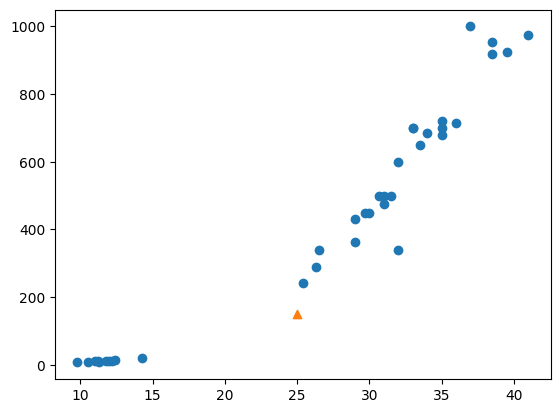

In [46]:
plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(25,150, marker='^')
plt.show()

In [51]:
indexes = kn.kneighbors([[25, 150]])[1]

/Users/june/Desktop/DMF/ML/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [52]:
n_df = train_input.iloc[indexes[0]]

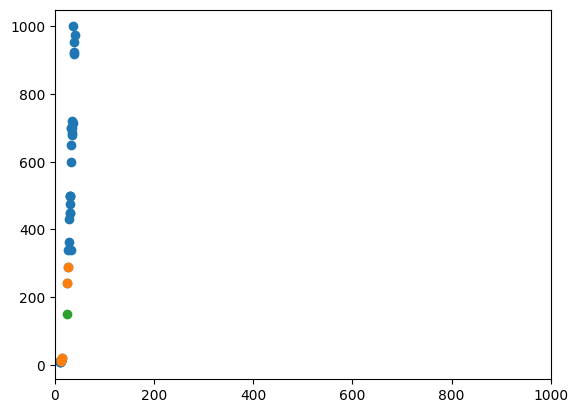

In [55]:
plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(n_df['Length2'], n_df['Weight'])
plt.scatter(25, 150)
plt.xlim(0, 1000)
plt.show()

- 표준점수

```
(데이터 - 평균) / 표준편차
```

In [62]:
mean = train_input.mean()

In [63]:
std = train_input.std()

In [64]:
train_input.head()

,Length2,Weight
26,35.0,720.0
3,29.0,363.0
150,11.3,8.7
9,30.7,500.0
149,11.2,9.8


In [65]:
(train_input - mean).head()

,Length2,Weight
26,8.066667,278.016667
3,2.066667,-78.983333
150,-15.633333,-433.283333
9,3.766667,58.016667
149,-15.733333,-432.183333


In [67]:
train_scaled = ((train_input - mean) / std) #표준점수

In [69]:
new = ([25, 150] - mean) / std
new

Length2   -0.188902
Weight    -0.884177
dtype: float64

In [70]:
kn.fit(train_scaled, train_target['Species'])

KNeighborsClassifier()

In [72]:
test_scaled = (test_input - mean) / std

In [73]:
kn.score(test_scaled, test_target)

1.0

In [77]:
kn.predict([new])

/Users/june/Desktop/DMF/ML/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)

### 펭귄데이터 연습

In [78]:
import seaborn as sns

In [79]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [80]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [100]:
df['bill_length_mm'].isnull() # 3,339
df.drop(columns = 'sex').dropna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0
...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0


In [101]:
df = df.drop(columns = 'sex').dropna()

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
dtypes: float64(4), object(2)
memory usage: 18.7+ KB


In [103]:
df_ad = df.loc[df['species'] == 'Adelie'] #151

In [104]:
df_ch = df.loc[df['species'] == 'Chinstrap'] #68

In [105]:
df_gt = df.loc[df['species'] == 'Gentoo'] #123

In [108]:
df_gt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, 220 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            123 non-null    object 
 1   island             123 non-null    object 
 2   bill_length_mm     123 non-null    float64
 3   bill_depth_mm      123 non-null    float64
 4   flipper_length_mm  123 non-null    float64
 5   body_mass_g        123 non-null    float64
dtypes: float64(4), object(2)
memory usage: 6.7+ KB


In [109]:
df_ad.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0


In [110]:
df_ch.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
152,Chinstrap,Dream,46.5,17.9,192.0,3500.0
153,Chinstrap,Dream,50.0,19.5,196.0,3900.0
154,Chinstrap,Dream,51.3,19.2,193.0,3650.0
155,Chinstrap,Dream,45.4,18.7,188.0,3525.0
156,Chinstrap,Dream,52.7,19.8,197.0,3725.0


In [111]:
df_gt.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0


In [177]:
df1 = pd.concat([df_ad, df_gt])

In [193]:
f1 = 'bill_length_mm'
f2 = 'bill_depth_mm'

In [194]:
pen_data = df1[[f1, f2]]

In [195]:
pen_data.head()

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
4,36.7,19.3
5,39.3,20.6


In [196]:
pen_target = df1[['species']]

In [197]:
pen_target

,species
0,Adelie
1,Adelie
2,Adelie
4,Adelie
5,Adelie
...,...
338,Gentoo
340,Gentoo
341,Gentoo
342,Gentoo


In [198]:
train_input, test_input, train_target, test_target = train_test_split(pen_data, pen_target, stratify=pen_target, random_state=5)

In [199]:
kn.fit(train_input, train_target['species'])

KNeighborsClassifier()

In [200]:
kn.score(test_input, test_target)

1.0

In [201]:
train_input.head()

,bill_length_mm,bill_depth_mm
260,42.7,13.7
91,41.1,18.1
275,45.0,15.4
315,50.8,15.7
79,42.1,19.1


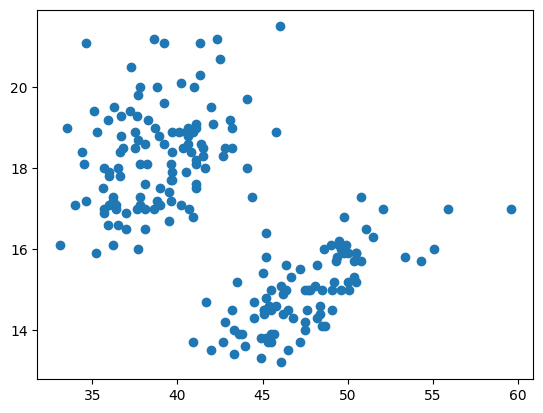

In [202]:
plt.scatter(train_input[f1], train_input[f2])
plt.show()

In [203]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [204]:
df.dropna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0
...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0


In [205]:
df.groupby('species').mean(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.791391,18.346358,189.953642,3700.662252
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.504878,14.982114,217.186992,5076.016260


In [206]:
import matplotlib.pyplot as plt

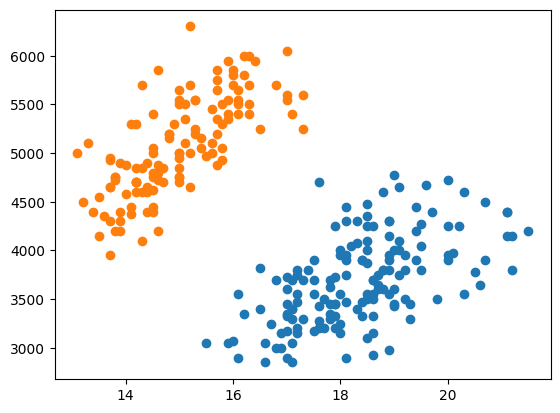

In [227]:
c_ad = df['species'] == 'Adelie'
c_ch = df['species'] == 'Chinstrap'
c_ge = df['species'] == 'Gentoo'

plt.scatter(df.loc[c_ad, 'bill_depth_mm'], df.loc[c_ad, 'body_mass_g'])
plt.scatter(df.loc[c_ge, 'bill_depth_mm'], df.loc[c_ge, 'body_mass_g'])

plt.show()

In [228]:
cond = df['species'].isin(['Adelie', 'Gentoo'])
pg_data = df.loc[cond, ['bill_depth_mm', 'body_mass_g']]
#pg_data.head()

In [229]:
pg_target = df.loc[cond, ['species']]

In [230]:
from sklearn.model_selection import train_test_split

In [231]:
train_input, test_input, train_target, test_traget = train_test_split(pg_data, pg_target, stratify=pg_target)

In [232]:
kn.fit(train_input, train_target['species'])

KNeighborsClassifier()

In [233]:
kn.score(test_input, test_target['species'])

0.43478260869565216

In [234]:
mean = train_input.mean()
std = train_input.std()

In [235]:
train_scaled = (train_input - mean )/ std

In [236]:
kn.fit(train_scaled, train_target['species'])

KNeighborsClassifier()

In [237]:
test_scaled = (test_input - mean) / std

In [240]:
kn.score(test_scaled, test_target)

0.391304347826087